In [1]:
"""
Project 4 - Computing alignments of sequences
"""

'\nProject 4 - Computing alignments of sequences\n'

<h1>Project 4 - Computing alignments of sequences</h1>

In [2]:

def build_scoring_matrix(alphabet, diag_score, off_diag_score, dash_score): 
    """This function takes as input a set of characters alphabet and three scores 
    diag_score, off_diag_score, and dash_score. The function returns a dictionary 
    of dictionaries whose entries are indexed by pairs of characters in alphabet plus '-'. 
    The score for any entry indexed by one or more dashes is dash_score. 
    The score for the remaining diagonal entries is diag_score. Finally, 
    the score for the remaining off-diagonal entries is off_diag_score.
    """
    results = {}
    alphabet_list = list(alphabet)
    alphabet_list.append('-')
    print alphabet_list
    for letter1 in alphabet_list:
        temp_dict = {}
        for letter2 in alphabet_list:
            if letter1 == letter2 and letter1 != '-':
                temp_dict[letter2] = diag_score
            elif letter1 == '-' or letter2 == '-':
                temp_dict[letter2] = dash_score
            else:
                temp_dict[letter2] = off_diag_score
        results[letter1] = temp_dict
    return results
#print build_scoring_matrix(set(['A', 'C', 'T', 'G']), 6, 2, -4)

In [3]:
#build_scoring_matrix(set(['A', 'C', 'T', 'G']), 6, 2, -4) 
#expected {'A': {'A': 6, 'C': 2, '-': -4, 'T': 2, 'G': 2}, 
#'C': {'A': 2, 'C': 6, '-': -4, 'T': 2, 'G': 2}, 
#'-': {'A': -4, 'C': -4, '-': -4, 'T': -4, 'G': -4}, 
#'T': {'A': 2, 'C': 2, '-': -4, 'T': 6, 'G': 2}, 
#'G': {'A': 2, 'C': 2, '-': -4, 'T': 2, 'G': 6}} 


In [4]:
#The second function computes an alignment matrix using the method 
#ComputeGlobalAlignmentScores described in Homework 4. The function computes either 
#a global alignment matrix or a local alignment matrix depending on the value of global_flag.
def compute_alignment_matrix(seq_x, seq_y, scoring_matrix, global_flag): 
    """
    This function takes as input two sequences seq_x and seq_y whose elements share 
    a common alphabet with the scoring matrix scoring_matrix. The function computes 
    and returns the alignment matrix for seq_x and seq_y as described in the Homework. 
    If global_flag is True, each entry of the alignment matrix is computed using 
    the method described in Question 8 of the Homework. If global_flag is False, 
    each entry is computed using the method described in Question 12 of the Homework.
    """
    results = []
    x_len = len(seq_x)
    y_len = len(seq_y)
    results.append([0])
    # fill in the first column of the scoring matrix
    for i_tmp in range(1, x_len + 1):
        score_tmp = results[i_tmp - 1][0] + scoring_matrix[seq_x[i_tmp - 1]]['-']
        # in case of score < 0 and falg is false (local score computing) the assign score is 0
        if not global_flag and score_tmp < 0: 
            results.append([0])
        else:
            results.append([score_tmp])
                        
    # fill in the first row of the scoring matrix
    for j_tmp in range(1, y_len + 1):
        score_tmp = results[0][j_tmp - 1] + scoring_matrix['-'][seq_y[j_tmp - 1]]
        # in case of score < 0 and falg is false (local score computing) the assign score is 0
        if not global_flag and score_tmp < 0: 
            results[0].append(0)
        else:
            results[0].append(score_tmp)
    # calculate the rest of the scoring matrix
    for i_tmp in range(1, x_len + 1):
        for j_tmp in range(1, y_len + 1):
            score1 = results[i_tmp - 1][j_tmp - 1] + scoring_matrix[seq_x[i_tmp - 1]][seq_y[j_tmp - 1]]
            score2 = results[i_tmp - 1][j_tmp] + scoring_matrix[seq_x[i_tmp - 1]]['-']
            score3 = results[i_tmp][j_tmp - 1] + scoring_matrix['-'][seq_y[j_tmp - 1]]
            score_max = max(score1, score2, score3)
            # in case of max score < 0 and falg is false (local score computing) the assign score is 0
            if not global_flag and score_max < 0:
                results[i_tmp].append(0)
            else:
                results[i_tmp].append(score_max)
                            
    return results

In [5]:
compute_alignment_matrix('ATG', 'ACG', {'A': {'A': 6, 'C': 2, '-': -4, 'T': 2, 'G': 2}, 
                                        'C': {'A': 2, 'C': 6, '-': -4, 'T': 2, 'G': 2}, 
                                        '-': {'A': -4, 'C': -4, '-': -4, 'T': -4, 'G': -4}, 
                                        'T': {'A': 2, 'C': 2, '-': -4, 'T': 6, 'G': 2}, 
                                        'G': {'A': 2, 'C': 2, '-': -4, 'T': 2, 'G': 6}}, False)
#expected [[0, -4, -8, -12], [-4, 6, 2, -2], [-8, 2, 8, 4], [-12, -2, 4, 14]] 
#         [[0, -4, -8, -12], [-4, 6, 2, -2], [-8, 2, 8, 4], [-12, -2, 4, 14]]

[[0, 0, 0, 0], [0, 6, 2, 2], [0, 2, 8, 4], [0, 2, 4, 14]]

In [6]:
# The first function will implement the method ComputeAlignment discussed in Question 9 of 
# the Homework.
def compute_global_alignment(seq_x, seq_y, scoring_matrix, alignment_matrix):
    """Takes as input two sequences seq_x and seq_y whose elements share a common 
    alphabet with the scoring matrix scoring_matrix. This function computes a global alignment 
    of seq_x and seq_y using the global alignment matrix alignment_matrix.
    The function returns a tuple of the form (score, align_x, align_y) where score is 
    the score of the global alignment align_x and align_y. Note that align_x and align_y 
    should have the same length and may include the padding character '-'.
    """
    score = 0
    align_x = str()
    align_y = str()
    i_tmp = len(seq_x)
    j_tmp = len(seq_y)
    while i_tmp != 0 and j_tmp != 0:
        if alignment_matrix[i_tmp][j_tmp] == alignment_matrix[i_tmp - 1][j_tmp - 1] + \
                                    scoring_matrix[seq_x[i_tmp - 1]][seq_y[j_tmp - 1]]:
            align_x = seq_x[i_tmp - 1] + align_x
            align_y = seq_y[j_tmp - 1] + align_y
            i_tmp -= 1
            j_tmp -= 1                                                                 
        elif alignment_matrix[i_tmp][j_tmp] == alignment_matrix[i_tmp - 1][j_tmp] + \
                                    scoring_matrix[seq_x[i_tmp - 1]]['-']:
            align_x = seq_x[i_tmp - 1] + align_x
            align_y = '-' + align_y
            i_tmp -= 1
        else:
            align_x = '-' + align_x
            align_y = seq_y[j_tmp - 1] + align_y
            j_tmp -= 1               
    while i_tmp != 0:
        align_x = seq_x[i_tmp - 1] + align_x
        align_y = '-' + align_y
        i_tmp -= 1
    while j_tmp != 0:
        align_x = '-' + align_x
        align_y = seq_y[j_tmp - 1] + align_y
        j_tmp -= 1
    #calculate score for the final alignment    
    for letter in range(len(align_x)):
        score += scoring_matrix[align_x[letter]][align_y[letter]]
    return (score, align_x, align_y)

In [7]:
compute_global_alignment('A', 'A', {'A': {'A': 6, 'C': 2, '-': -4, 'T': 2, 'G': 2}, 
                                    'C': {'A': 2, 'C': 6, '-': -4, 'T': 2, 'G': 2}, 
                                    '-': {'A': -4, 'C': -4, '-': -4, 'T': -4, 'G': -4}, 
                                    'T': {'A': 2, 'C': 2, '-': -4, 'T': 6, 'G': 2}, 
                                    'G': {'A': 2, 'C': 2, '-': -4, 'T': 2, 'G': 6}}, 
                         [[0, -4], [-4, 6]])  
#returned incorrect score, expected 6

(6, 'A', 'A')

In [8]:
# This second function will compute an optimal local alignment starting at 
# the maximum entry of the local alignment matrix and working backwards to 
# zero as described in Question 13 of the Homework.
def compute_local_alignment(seq_x, seq_y, scoring_matrix, alignment_matrix):
    """
    This function takes as input two sequences seq_x and seq_y whose elements share 
    a common alphabet with the scoring matrix scoring_matrix. This function computes 
    a local alignment of seq_x and seq_y using the local alignment matrix alignment_matrix.
    The function returns a tuple of the form (score, align_x, align_y) where score is 
    the score of the optimal local alignment align_x and align_y. Note that align_x and align_y 
    should have the same length and may include the padding character '-'.
    """
    score = 0
    align_x = str()
    align_y = str()
    idx = (0, 0, 0)
    #print 'len a_m', len(alignment_matrix)
    for idx_i in range(len(alignment_matrix)):
        max_val = max(alignment_matrix[idx_i])
        idx_j = alignment_matrix[idx_i].index(max_val)
        if idx[0] <= max_val:
            idx = (max_val, idx_i, idx_j)
    #print 'idx', idx
    i_tmp = idx[1]
    j_tmp = idx[2]
    #print i_tmp, j_tmp
    #print 'a_m', alignment_matrix[i_tmp][j_tmp]
    while alignment_matrix[i_tmp][j_tmp] != 0:
        #print 'a_m', alignment_matrix[i_tmp][j_tmp]
        if alignment_matrix[i_tmp][j_tmp] == alignment_matrix[i_tmp - 1][j_tmp - 1] + \
                                    scoring_matrix[seq_x[i_tmp - 1]][seq_y[j_tmp - 1]]:
            align_x = seq_x[i_tmp - 1] + align_x
            align_y = seq_y[j_tmp - 1] + align_y
            i_tmp -= 1
            j_tmp -= 1                                                                 
        elif alignment_matrix[i_tmp][j_tmp] == alignment_matrix[i_tmp - 1][j_tmp] + \
                                    scoring_matrix[seq_x[i_tmp - 1]]['-']:
            align_x = seq_x[i_tmp - 1] + align_x
            align_y = '-' + align_y
            i_tmp -= 1
        else:
            align_x = '-' + align_x
            align_y = seq_y[j_tmp - 1] + align_y
            j_tmp -= 1         
    for letter in range(len(align_x)):
        #print scoring_matrix[align_x[letter]][align_y[letter]]
        score += scoring_matrix[align_x[letter]][align_y[letter]]
    return (score, align_x, align_y)

In [9]:
compute_local_alignment('A', 'A', {'A': {'A': 6, 'C': 2, '-': -4, 'T': 2, 'G': 2}, 
                                   'C': {'A': 2, 'C': 6, '-': -4, 'T': 2, 'G': 2}, 
                                   '-': {'A': -4, 'C': -4, '-': -4, 'T': -4, 'G': -4}, 
                                   'T': {'A': 2, 'C': 2, '-': -4, 'T': 6, 'G': 2}, 
           
                                   'G': {'A': 2, 'C': 2, '-': -4, 'T': 2, 'G': 6}}, 
                        [[0, 0], [0, 6]])
#expected score 6

(6, 'A', 'A')

In [10]:
compute_local_alignment('AAAACCCCAAAA', 'AAAAGTCCCAAAC', 
                        {'A': {'A': 2, 'C': 1, '-': 0, 'T': 1, 'G': 1}, 
                         'C': {'A': 1, 'C': 2, '-': 0, 'T': 1, 'G': 1}, 
                         '-': {'A': 0, 'C': 0, '-': 0, 'T': 0, 'G': 0}, 
                         'T': {'A': 1, 'C': 1, '-': 0, 'T': 2, 'G': 1}, 
                         'G': {'A': 1, 'C': 1, '-': 0, 'T': 1, 'G': 2}}, 
                        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                         [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 
                         [0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 
                         [0, 2, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 
                         [0, 2, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], 
                         [0, 2, 4, 6, 8, 9, 9, 10, 10, 10, 10, 10, 10, 10], 
                         [0, 2, 4, 6, 8, 9, 10, 11, 12, 12, 12, 12, 12, 12], 
                         [0, 2, 4, 6, 8, 9, 10, 12, 13, 14, 14, 14, 14, 14], 
                         [0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 15, 15, 15, 16], 
                         [0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 17, 17, 17, 17], 
                         [0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 17, 19, 19, 19], 
                         [0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 17, 19, 21, 21], 
                         [0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 17, 19, 21, 22]])
#expected score 22

(22, 'AAAA-CCCCAAAA', 'AAAAGTCCCAAAC')

#Application 4 - Applications to genomics and beyond

In [11]:
import random
import urllib2
import matplotlib.pyplot as plt
#if DESKTOP:
#    import matplotlib.pyplot as plt
#    import alg_project4_solution as student
#else:
#    import simpleplot
#    import userXX_XXXXXXX as student
    

# URLs for data files
PAM50 = "alg_PAM50.txt"
HUMAN_EYELESS = "alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS = "alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX = "alg_ConsensusPAXDomain.txt"
WORD_LIST = "assets_scrabble_words3.txt"



###############################################
# provided code

def read_scoring_matrix(filename):
    """
    Read a scoring matrix from the file named filename.  

    Argument:
    filename -- name of file containing a scoring matrix

    Returns:
    A dictionary of dictionaries mapping X and Y characters to scores
    """
    scoring_dict = {}
    scoring_file = open(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()
    for line in scoring_file.readlines():
        vals = line.split()
        xkey = vals.pop(0)
        scoring_dict[xkey] = {}
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)
    return scoring_dict




def read_protein(filename):
    """
    Read a protein sequence from the file named filename.

    Arguments:
    filename -- name of file containing a protein sequence

    Returns:
    A string representing the protein
    """
    protein_file = open(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq


def read_words(filename):
    """
    Load word list from the file named filename.

    Returns a list of strings.
    """
    # load assets
    word_file = open(filename)
    
    # read in files as string
    words = word_file.read()
    
    # template lines and solution lines list of line string
    word_list = words.split('\n')
    print "Loaded a dictionary with", len(word_list), "words"
    return word_list



<h1>Question 1 (2 pts)</h1>
<p>First, load the files HumanEyelessProtein and FruitflyEyelessProtein using the provided code. These files contain the amino acid sequences that form the eyeless proteins in the human and fruit fly genomes, respectively. Then load the scoring matrix PAM50 for sequences of amino acids.</p>
<p>Next, compute the local alignments of the sequences of HumanEyelessProtein and FruitflyEyelessProtein using the PAM50 scoring matrix and enter the score and local alignments for these two sequences below. Be sure to clearly distinguish which alignment is which and include any dashes ('-') that might appear in the local alignment. </p>

In [12]:
HumanEyelessProtein = read_protein(HUMAN_EYELESS)
FruitflyEyelessProtein = read_protein(FRUITFLY_EYELESS)
pam50_scoring = read_scoring_matrix(PAM50)

In [13]:
print HumanEyelessProtein
print FruitflyEyelessProtein
print pam50_scoring

MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQEGGGENTNSISSNGEDSDEAQMRLQLKRKLQRNRTSFTQEQIEALEKEFERTHYPDVFARERLAAKIDLPEARIQVWFSNRRAKWRREEKLRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPTSPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPRLQ
MRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQSTGSGSSSTSAGNSISAKVSVSIGGNVSNVASGSRGTLSSSTDLMQTATPLNSSESGGASNSGEGSEQEAIYEKLRLLNTQHAAGPGPLEPARAAPLVGQSPNHLGTRSSHPQLVHGNHQALQQHQQQSWPPRHYSGSWYPTSLSEIPISSAPNIASVTAYASGPSLAHSLSPPNDIESLASIGHQRNCPVATEDIHLKKELDGHQSDETGSGEGENSNGGASNIGNTEDDQARLILKRKLQRNRTSFTNDQIDSLEKEFERTHYPDVFARERLAGKIGLPEARIQVWFSNRRAKWRREEKLRNQRRTPNSTGASATSSSTSATASLTDSPNSLSACSSLLSGSAGGPSVSTINGLSSPSTLSTNVNAPTLGAGIDSSESPTPIPHIR

In [14]:
# computing local alignment matrix
l_a_matrix = compute_alignment_matrix(HumanEyelessProtein, FruitflyEyelessProtein, 
                                      pam50_scoring, False)
# computing local alignment
l_alignment = compute_local_alignment(HumanEyelessProtein, FruitflyEyelessProtein, 
                                      pam50_scoring, l_a_matrix)
print l_alignment, len(l_alignment[1]), len(l_alignment[2])

(875, 'HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ', 'HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ') 133 133


<b>Question 2 (2 pts)</b>
<p>We next consider the similarity of the two sequences in the local alignment computed in Question 1 to a third sequence. The file ConsensusPAXDomain contains a "consensus" sequence of the PAX domain; that is, the sequence of amino acids in the PAX domain in any organism. In this problem, we will compare each of the two sequences of the local alignment computed in Question 1 to this consensus sequence to determine whether they correspond to the PAX domain.</p>
<p>Load the file ConsensusPAXDomain. For each of the two sequences of the local alignment computed in Question 1, do the following:</p>
<uo>
<li>Delete any dashes '-' present in the sequence.</li> 
<li>Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence.</li>
<li>Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) and compute the percentage of elements in these two sequences that agree.</li>
<uo>
<p>To reiterate, you will compute the global alignments of local human vs. consensus PAX domain as well as local fruitfly vs. consensus PAX domain. Your answer should be two percentages: one for each global alignment. Enter each percentage below. Be sure to label each answer clearly and include three significant digits of precision.</p>


In [15]:
ConsensusPAXDomain = read_protein(CONSENSUS_PAX)
print ConsensusPAXDomain

GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR


In [16]:
ConsensusPAXDomain

'GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR'

In [17]:
def get_rid_dash(sequence):
    """
    This function delete any dashes '-' present in the sequence
    """
    new_sequence = str()
    for letter in sequence:
        if letter != '-':
            new_sequence += letter
    return new_sequence

In [18]:
h_l_alignment = l_alignment[1]
f_l_alignment = l_alignment[2]

In [19]:
h_l_alignment_noDash = get_rid_dash(h_l_alignment)
f_l_alignment_noDash = get_rid_dash(f_l_alignment)

In [20]:
print h_l_alignment
print h_l_alignment_noDash
print f_l_alignment
print f_l_alignment_noDash

HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


In [57]:
def alignment_agreement(seq1, seq2):
    """
    Compare corresponding elements of these two sequences and compute 
    the percentage of elements in these two sequences that agree.
    """
    counter = 0
    for indx in range(len(seq1)):
        if seq1[indx] == seq2[indx] and seq1[indx] != '-':
            #print seq1[indx]
            counter += 1
    return 100.0 * counter / len(seq2)

In [58]:
# test alignment agreement
seq_1 = 'HGVNQLGGVF'
seq_2 = 'SGVNQLGGVF'
print 'alignment_agreement(seq_1, seq_2)', alignment_agreement(seq_1, seq_2)
seq_3 = '--VNQLGGVF'
print 'alignment_agreement(seq_1, seq_3)', alignment_agreement(seq_1, seq_3)
seq_4 = '-GVNQLGGVF'
print 'alignment_agreement(seq_3, seq_4)', alignment_agreement(seq_3, seq_4)

alignment_agreement(seq_1, seq_2) 90.0
alignment_agreement(seq_1, seq_3) 80.0
alignment_agreement(seq_3, seq_4) 80.0


In [59]:
# computing human consensus global alignment matrix
h_g_a_matrix = compute_alignment_matrix(h_l_alignment_noDash, ConsensusPAXDomain, 
                                      pam50_scoring, True)
# computing human consensus global alignment
h_g_alignment = compute_global_alignment(h_l_alignment_noDash, ConsensusPAXDomain, 
                                      pam50_scoring, h_g_a_matrix)
# computing the percentage of elements in human consensus global alignment that agree
h_g_alignment_agree = alignment_agreement(h_g_alignment[1], h_g_alignment[2])

print "h_g_alignment_agree =", h_g_alignment_agree
print h_g_alignment

h_g_alignment_agree = 72.9323308271
(613, '-HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ', 'GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR--------')


In [60]:
# computing fruitfly consensus global alignment matrix
f_g_a_matrix = compute_alignment_matrix(f_l_alignment_noDash, ConsensusPAXDomain, 
                                      pam50_scoring, True)
# computing fruitfly consensus global alignment
f_g_alignment = compute_global_alignment(f_l_alignment_noDash, ConsensusPAXDomain, 
                                      pam50_scoring, f_g_a_matrix)
# computing the percentage of elements in fruitfly consensus global alignment that agree
f_g_alignment_agree = alignment_agreement(f_g_alignment[1], f_g_alignment[2])

print "f_g_alignment_agree =", f_g_alignment_agree
print f_g_alignment

f_g_alignment_agree = 70.1492537313
(586, '-HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ', 'GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR---------')


In [25]:
import random
seq_tmp = 'ACBEDGFIHKMLNQPSRTWVYXZ'
results = []
for i in range(100000):
    seq_tmp_1 = seq_tmp
    seq_tmp_2 = seq_tmp
    l_1 = list(seq_tmp_1)
    random.shuffle(l_1)
    seq_tmp_1_s = ''.join(l_1)
    l_2 = list(seq_tmp_2)
    random.shuffle(l_2)
    seq_tmp_2_s = ''.join(l_2)    
    results.append(alignment_agreement(seq_tmp_1_s, seq_tmp_2_s))
print sum(results)/len(results)

4.33230434783


<b>Question 4 (2 pts)</b>
<p>Write a function generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials) that takes as input two sequences seq_x and seq_y, a scoring matrix scoring_matrix, and a number of trials num_trials. This function should return a dictionary scoring_distribution that represents an un-normalized distribution generated by performing the following process num_trials times:<p>
<uo>
<li>Generate a random permutation rand_y of the sequence seq_y using random.shuffle().</li>
<li>Compute the maximum value score for the local alignment of seq_x and rand_y using the score matrix scoring_matrix.</li>
<li>Increment the entry score in the dictionary scoring_distribution by one.</li>

In [26]:
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials): 
    """
    This function takes as input two sequences seq_x and seq_y, a scoring_matrix, 
    and a number of trials num_trials. This function returns a dictionary 
    scoring_distribution that represents an un-normalized distribution generated 
    by performing the following process num_trials times:
    - Generate a random permutation rand_y of the sequence seq_y using random.shuffle()
    - Compute the maximum value score for the local alignment of seq_x and rand_y using 
      the score matrix scoring_matrix.
    - Increment the entry score in the dictionary scoring_distribution by one.
    """
    results = {}
    for trial in range(num_trials):
        seq_y_tmp = seq_y
        l_y1 = list(seq_y_tmp)
        random.shuffle(l_y1)
        seq_y_tmp_s = ''.join(l_y1)
        # computing local alignment matrix
        l_matrix = compute_alignment_matrix(seq_x, seq_y_tmp_s, 
                                      scoring_matrix, False)
        # computing local alignment
        l_align = compute_local_alignment(seq_x, seq_y_tmp_s, 
                                      scoring_matrix, l_matrix)
        #print l_align
        results[trial + 1] = l_align[0] 
    return results

In [27]:
distr_h_f_10tr = generate_null_distribution(HumanEyelessProtein, 
                                            FruitflyEyelessProtein, pam50_scoring, 10)

In [28]:
print distr_h_f_10tr

{1: 54, 2: 53, 3: 53, 4: 48, 5: 68, 6: 49, 7: 47, 8: 46, 9: 47, 10: 72}


In [29]:
distr_h_f_1000tr = generate_null_distribution(HumanEyelessProtein, 
                                            FruitflyEyelessProtein, pam50_scoring, 1000)

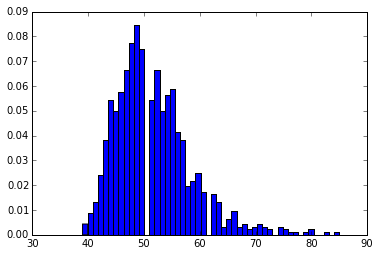

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = distr_h_f_1000tr.values()
n, bins, patches = plt.hist(scores, 50, normed=1)

In [31]:
distr_h_f_1000tr_new = generate_null_distribution(HumanEyelessProtein, 
                                            FruitflyEyelessProtein, pam50_scoring, 1000)

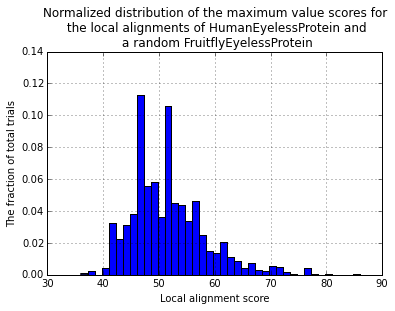

In [32]:
scores_new = distr_h_f_1000tr_new.values()
plt.hist(scores_new, 40, normed=1)
plt.xlim([30, 90])
plt.ylim([0, .14])
#plt.legend(loc='upper left')
plt.title('Normalized distribution of the maximum value scores for \n the local alignments of HumanEyelessProtein and \n a random FruitflyEyelessProtein')
plt.xlabel('Local alignment score')
plt.ylabel('The fraction of total trials')
plt.grid(True)
plt.savefig('p4a1.png')

In [47]:
#calculate norm distribution
from collections import Counter
counted_distr = Counter(distr_h_f_1000tr_new.values()).most_common()
print counted_distr
x_val, y_val = zip(*sorted(counted_distr))
print x_val
print y_val
y_val_norm = [val / 1000.0 for val in y_val]
print y_val_norm


[(47, 76), (49, 73), (48, 70), (51, 68), (46, 65), (52, 64), (53, 56), (54, 55), (45, 48), (50, 45), (55, 42), (44, 39), (56, 34), (58, 31), (42, 30), (43, 28), (57, 24), (59, 19), (60, 17), (61, 16), (63, 14), (41, 11), (64, 11), (62, 10), (70, 7), (66, 6), (40, 5), (65, 5), (68, 4), (72, 4), (77, 4), (38, 3), (67, 3), (69, 3), (71, 2), (73, 2), (36, 1), (74, 1), (76, 1), (78, 1), (80, 1), (86, 1)]
(36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 86)
(1, 3, 5, 11, 30, 28, 39, 48, 65, 76, 70, 73, 45, 68, 64, 56, 55, 42, 34, 24, 31, 19, 17, 16, 10, 14, 11, 5, 6, 3, 4, 3, 7, 2, 4, 2, 1, 1, 4, 1, 1, 1)
[0.001, 0.003, 0.005, 0.011, 0.03, 0.028, 0.039, 0.048, 0.065, 0.076, 0.07, 0.073, 0.045, 0.068, 0.064, 0.056, 0.055, 0.042, 0.034, 0.024, 0.031, 0.019, 0.017, 0.016, 0.01, 0.014, 0.011, 0.005, 0.006, 0.003, 0.004, 0.003, 0.007, 0.002, 0.004, 0.002, 0.001, 0.001, 0.004, 0.001,

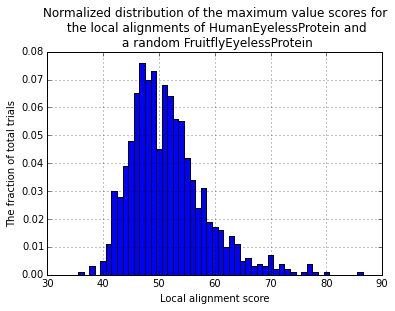

In [56]:
# plot bar
plt.bar(x_val, y_val_norm, width=1, align='center', color="blue")
plt.xlim([30, 90])
plt.ylim([0, .08])
#plt.legend(loc='upper left')
plt.title('Normalized distribution of the maximum value scores for \n the local alignments of HumanEyelessProtein and \n a random FruitflyEyelessProtein')
plt.xlabel('Local alignment score')
plt.ylabel('The fraction of total trials')
plt.grid(True)
plt.savefig('p4a1_ver2.png')

In [33]:
import numpy as np
from scipy import stats

mean_1000 = np.mean(distr_h_f_1000tr_new.values())
print 'mean =', mean_1000
std_100 = np.std(distr_h_f_1000tr_new.values())
print 'standard deviation =', std_100
z_score = stats.zscore(distr_h_f_1000tr_new.values())
print 'Z-score range:', min(z_score), 'to', max(z_score)

mean = 51.496
standard deviation = 6.76490827728
Z-score range: -2.29064450911 to 5.10043870305


In [34]:
import string
alphabet = string.ascii_lowercase
diag_score = 2
off_diag_score = 1 
dash_score = 0
NEW_SCORING = build_scoring_matrix(alphabet, diag_score, off_diag_score, dash_score)
print NEW_SCORING

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '-']
{'-': {'-': 0, 'a': 0, 'c': 0, 'b': 0, 'e': 0, 'd': 0, 'g': 0, 'f': 0, 'i': 0, 'h': 0, 'k': 0, 'j': 0, 'm': 0, 'l': 0, 'o': 0, 'n': 0, 'q': 0, 'p': 0, 's': 0, 'r': 0, 'u': 0, 't': 0, 'w': 0, 'v': 0, 'y': 0, 'x': 0, 'z': 0}, 'a': {'-': 0, 'a': 2, 'c': 1, 'b': 1, 'e': 1, 'd': 1, 'g': 1, 'f': 1, 'i': 1, 'h': 1, 'k': 1, 'j': 1, 'm': 1, 'l': 1, 'o': 1, 'n': 1, 'q': 1, 'p': 1, 's': 1, 'r': 1, 'u': 1, 't': 1, 'w': 1, 'v': 1, 'y': 1, 'x': 1, 'z': 1}, 'c': {'-': 0, 'a': 1, 'c': 2, 'b': 1, 'e': 1, 'd': 1, 'g': 1, 'f': 1, 'i': 1, 'h': 1, 'k': 1, 'j': 1, 'm': 1, 'l': 1, 'o': 1, 'n': 1, 'q': 1, 'p': 1, 's': 1, 'r': 1, 'u': 1, 't': 1, 'w': 1, 'v': 1, 'y': 1, 'x': 1, 'z': 1}, 'b': {'-': 0, 'a': 1, 'c': 1, 'b': 2, 'e': 1, 'd': 1, 'g': 1, 'f': 1, 'i': 1, 'h': 1, 'k': 1, 'j': 1, 'm': 1, 'l': 1, 'o': 1, 'n': 1, 'q': 1, 'p': 1, 's': 1, 'r': 1, 'u': 1, 't': 1, 'w': 1, 'v':

In [35]:
w_list = read_words(WORD_LIST)

Loaded a dictionary with 79340 words


<b>Question 8 (2 pts)</b>
<p>In practice, edit distance is a useful tool in applications such as spelling correction and plagiarism detection where determining whether two strings are similar/dissimilar is important. For this final question, we will implement a simple spelling correction function that uses edit distance to determine whether a given string is the misspelling of a word.</p>
<p>To begin, load this list of 79339 words. Then, write a function check_spelling(checked_word, dist, word_list) that iterates through word_list and returns the set of all words that are within edit distance dist of the string checked_word.</p>
<p>Use your function check_spelling to compute the set of words within an edit distance of one from the string "humble" and the set of words within an edit distance of two from the string "firefly". (Note this is not "fruitfly".)</p>
<p>Enter these two sets of words in the box below. As quick check, both sets should include eleven words.</p>

In [36]:
def check_spelling(checked_word, dist, word_list):
    """
    This function iterates through word_list and returns the set of all 
    words that are within edit distance dist of the string checked_word.
    """
    results = []
    for word in word_list:
        # computing global alignment matrix
        g_a_m = compute_alignment_matrix(checked_word, word, 
                                      NEW_SCORING, True)
        # computing global alignment
        g_alignment = compute_global_alignment(checked_word, word, 
                                      NEW_SCORING, g_a_m)
        dist_tmp = abs(len(checked_word) + len(word) - g_alignment[0])
        #print word, dist_tmp
        if dist_tmp <= dist:
            results.append(word)
    return results

In [37]:
word1 = 'humble'
word1_list = check_spelling(word1, 1, w_list)
print 'List of words within an edit distance of one from', word1, ': \n', word1_list

List of words within an edit distance of one from humble : 
['bumble', 'fumble', 'humble', 'humbled', 'humbler', 'humbles', 'humbly', 'jumble', 'mumble', 'rumble', 'tumble']


In [38]:
word2 = 'firefly'
word2_list = check_spelling(word2, 2, w_list)
print 'List of words within an edit distance of one from', word2, ': \n', word2_list

List of words within an edit distance of one from firefly : 
['direly', 'finely', 'fireclay', 'firefly', 'firmly', 'firstly', 'fixedly', 'freely', 'liefly', 'refly', 'tiredly']
